In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Observations and Insights
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
# Read the study results
study_results_df = pd.read_csv(study_results_path)

In [5]:
# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

In [6]:
# Display the data table for preview
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mice = combined_study_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_df.loc[combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id = pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_study_df[combined_study_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

In [12]:
#  Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_df.groupby('Drug Regimen')

# calculate the following properties of each drug regimen of each drug regimen:
tumor_vol_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = summary_df["Tumor Volume (mm3)"].median()
tumor_vol_variance = summary_df["Tumor Volume (mm3)"].var()
tumor_vol_standard_deviation = summary_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = summary_df["Tumor Volume (mm3)"].sem()

# Create a DatFrame to summarizes the findings
grouped_summary_df = pd.DataFrame({"Mean": tumor_vol_mean,
                                   "Median": tumor_vol_median,
                                   "Variance": tumor_vol_variance,
                                   "Standard Deviation": tumor_vol_standard_deviation,
                                   "Standard Error of the Mean:": tumor_vol_sem})

grouped_summary_df.head(10)

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean:
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Bar and Pie Charts
# Count how many each treatment appears 
drug_group = clean_df.groupby('Drug Regimen')
count_timepoints = drug_group['Drug Regimen'].count()

count_timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


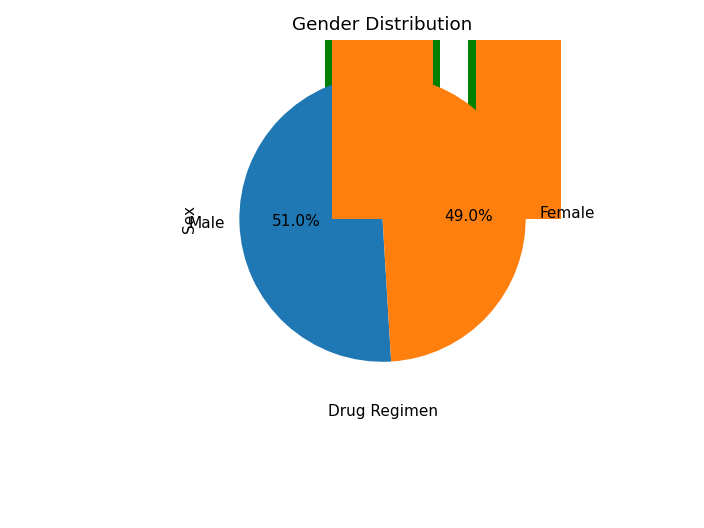

In [14]:
# Create a bar chart based off of the group series from before
#colors = [
#    "#1f77b4",
#   "#ff7f0e",
#    "#2ca02c",
#    "#d62728",
#    "#9467bd",
#    "#8c564b",
#    "#e377c2",
#    "#7f7f7f",
#    "#bcbd22",
#    "#17becf",
#]
#count_treatment = count_timepoints.plot(kind="bar", stacked=True)


In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoints = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(timepoints))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
tick_locations = [value for value in x_axis]
tick_locations

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<IPython.core.display.Javascript object>


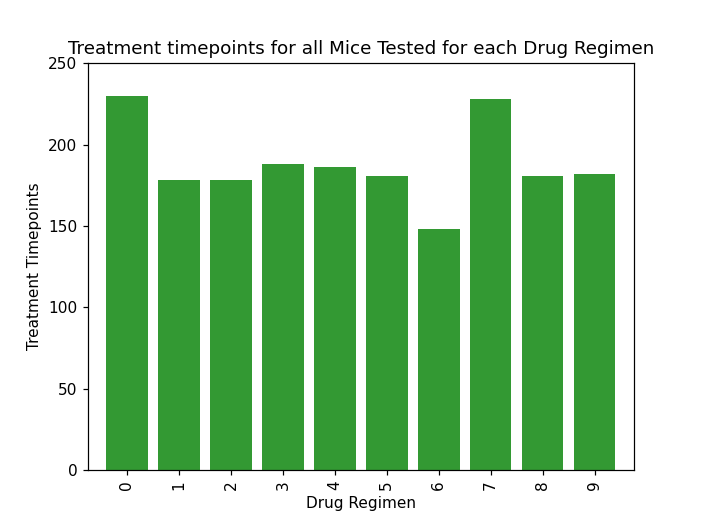

<BarContainer object of 10 artists>

In [37]:
# Create a bar chart based upon the above data
plt.bar(x_axis, timepoints, color="g", alpha=0.8, align="center")

In [38]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="vertical")

([<matplotlib.axis.XTick at 0x15fdd4286d8>,
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [39]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25) 

(-0.75, 9.75)

In [40]:
# Set the limits of the y axis
plt.ylim(0, 250) 

(0.0, 250.0)

In [41]:
# Give the chart a title, x label, and y label
plt.title("Treatment timepoints for all Mice Tested for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatment Timepoints")

Text(41.94444598754247, 0.5, 'Treatment Timepoints')

In [24]:
# Create the ticks for our drug regimen's x axis
#plt.xticks(rotation='vertical')
#tick_locations = [value for value in x_axis]
#plt.tick(tick_locations, drug_regimen)

In [25]:
# Save an image of the chart and print it to the screen
#output_file = "Matplotlib-Homework/images/pandasbar.png"
#plt.savefig(output_file)
plt.show()

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))


plt.bar(x_axis, counts, width = 0.7, zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

plt.grid(zorder=0)

# Display resulting plot
plt.show()
plt.tight_layout()

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
members = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "purple", "darkgreen", "grey", "darkblue", "orange", "aquamarine"]
explode = (0, 0.05, 0, 0)


In [28]:
# Labels for the sections of our pie chart
Sex = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.3, 0, 0.1, 0)

In [29]:
gender_data = clean_df["Sex"].value_counts()

pie_plot = gender_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Gender Distribution')


#pie_plot.set_ylabel('')

# Display resulting plot
#plt.show()

In [ ]:
plt.title("NYC Game Popularity")
plt.pie(members, explode=explode, labels=gyms, autopct="%1.1f%%", shadow=True, startangle=180)

plt.axis("equal")
plt.show()

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Drug Regimen
Capomulin    0.0
Ceftamin     0.0
Infubinol    0.0
Ketapril     0.0
Naftisol     0.0
Placebo      0.0
Propriva     0.0
Ramicane     0.0
Stelasyn     0.0
Zoniferol    0.0
Name: Tumor Volume (mm3), dtype: float64

In [38]:
 
Ceftamin     
Infubinol    
Ketapril     
Naftisol     
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182

Drug Regimen
Capomulin    0.0
Ceftamin     0.0
Infubinol    0.0
Ketapril     0.0
Naftisol     0.0
Placebo      0.0
Propriva     0.0
Ramicane     0.0
Stelasyn     0.0
Zoniferol    0.0
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen
Capomulin    0.0
Ceftamin     0.0
Infubinol    0.0
Ketapril     0.0
Naftisol     0.0
Placebo      0.0
Propriva     0.0
Ramicane     0.0
Stelasyn     0.0
Zoniferol    0.0
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

In [ ]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


In [ ]:
# Assemble the resulting series into a single summary dataframe.


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [ ]:
# Set the xlabel and ylabel
count_treatment.set_xlabel("Drug Regimen")
count_treatment.set_ylabel("Treatment Count")

plt.show()
plt.tight_layout()